In [1]:
!pip install --quiet breizhcrops contextily matplotlib geopandas


In [2]:
import contextily as ctx
import matplotlib.pyplot as plt
import breizhcrops
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
from breizhcrops import BreizhCrops
from breizhcrops.datasets.breizhcrops import BANDS as allbands

In [3]:
import breizhcrops
from breizhcrops import BreizhCrops

In [3]:
dataset = BreizhCrops(region="belle-ile")

In [4]:
dataset_frh04 = BreizhCrops(region="frh04")

frh04.csv: 9.63MB [00:01, 5.32MB/s]                            


downloading breizhcrops_dataset\2017\L1C\frh04.h5.tar.gz


frh04.h5.tar.gz: 1.01GB [02:31, 6.67MB/s]                               


extracting breizhcrops_dataset\2017\L1C\frh04.h5.tar.gz to breizhcrops_dataset\2017\L1C\frh04.h5
removing breizhcrops_dataset\2017\L1C\frh04.h5.tar.gz
checking integrity by file size...
ok!


In [5]:
dataset_frh04.index

,id,CODE_CULTU,path,meanCLD,sequencelength,classid,classname,region
idx,,,,,,,,
0,6017564,PTR,csv/frh04/6017564.csv,780.075742,102,8,temporary meadows,frh04
6,6054675,PTR,csv/frh04/6054675.csv,731.428571,49,8,temporary meadows,frh04
7,6018665,PTR,csv/frh04/6018665.csv,710.530612,49,8,temporary meadows,frh04
8,6019318,PTR,csv/frh04/6019318.csv,770.534653,101,8,temporary meadows,frh04
9,6019435,RGA,csv/frh04/6019435.csv,600.625715,49,8,temporary meadows,frh04
...,...,...,...,...,...,...,...,...
158327,5057907,PPH,csv/frh04/5057907.csv,633.608050,50,7,permanent meadows,frh04
158328,5057908,MIS,csv/frh04/5057908.csv,640.096150,50,3,corn,frh04
158330,5057910,MIS,csv/frh04/5057910.csv,662.517416,50,3,corn,frh04


In [6]:
dataset_frh04.index = dataset_frh04.index.drop(dataset_frh04.index[dataset_frh04.index['classname'] == 'temporary meadows'].index)
dataset_frh04.index = dataset_frh04.index.drop(dataset_frh04.index[dataset_frh04.index['classname'] == 'permanent meadows'].index)


In [8]:
dataset_frh04.index

,id,CODE_CULTU,path,meanCLD,sequencelength,classid,classname,region
idx,,,,,,,,
10,6019436,BTH,csv/frh04/6019436.csv,586.861363,49,1,wheat,frh04
14,6017566,BTH,csv/frh04/6017566.csv,762.577724,49,1,wheat,frh04
18,6022687,BTH,csv/frh04/6022687.csv,769.612359,102,1,wheat,frh04
19,6022885,MIE,csv/frh04/6022885.csv,616.419599,50,3,corn,frh04
21,6023168,MIE,csv/frh04/6023168.csv,815.020408,49,3,corn,frh04
...,...,...,...,...,...,...,...,...
158326,5057906,MIS,csv/frh04/5057906.csv,650.385132,50,3,corn,frh04
158328,5057908,MIS,csv/frh04/5057908.csv,640.096150,50,3,corn,frh04
158330,5057910,MIS,csv/frh04/5057910.csv,662.517416,50,3,corn,frh04


In [ ]:
field_parcels_geodataframe_frh04 = dataset_frh04.geodataframe()
field_parcels_geodataframe_frh04.head()

In [11]:
import pandas as pd
import time

# Create lists to store results
centroid_x_list = []
centroid_y_list = []
crop_type_list = []
area_list = []

field_parcels_geodataframe_frh04_to_4326 = field_parcels_geodataframe_frh04.to_crs(epsg=4326)
field_parcels_geodataframe_frh04_to_3395 = field_parcels_geodataframe_frh04.to_crs(epsg=3395)
# Assuming you have a GeoDataFrame named 'field_parcels_geodataframe'
for row in field_parcels_geodataframe_frh04_to_4326.itertuples():
    # Get the current time

    # Access the geometry of the current polygon
    polygon_geometry = row.geometry

    class_name = row.classname
    
    # Calculate the centroid of the polygon
    centroid_point = polygon_geometry.centroid

    # Append results to lists
    centroid_x_list.append(centroid_point.x)
    centroid_y_list.append(centroid_point.y)
    crop_type_list.append(class_name)

    # Print progress and current time every 100th iteration
    if row.Index % 100 == 0:
        current_time = time.strftime("%Y-%m-%d %H:%M:%S")
        print(f"Processed {row.Index} records at time {current_time}")

for row in field_parcels_geodataframe_frh04_to_3395.itertuples():
    polygon_geometry = row.geometry
    polygon_area = polygon_geometry.area // 2 
    area_list.append(polygon_area)

# Create a DataFrame from the lists
results_df = pd.DataFrame({
    "centroid_x": centroid_y_list,
    "centroid_y": centroid_x_list,
    "crop_type": crop_type_list,
    "area": area_list
})

# Save the DataFrame to a CSV file
results_df.to_csv("frh04_processed.csv", index=False)


Processed 0 records at time 2024-01-12 20:56:10
Processed 100 records at time 2024-01-12 20:56:10
Processed 200 records at time 2024-01-12 20:56:10
Processed 300 records at time 2024-01-12 20:56:10
Processed 400 records at time 2024-01-12 20:56:10
Processed 500 records at time 2024-01-12 20:56:10
Processed 600 records at time 2024-01-12 20:56:10
Processed 700 records at time 2024-01-12 20:56:10
Processed 800 records at time 2024-01-12 20:56:10
Processed 900 records at time 2024-01-12 20:56:10
Processed 1000 records at time 2024-01-12 20:56:10
Processed 1100 records at time 2024-01-12 20:56:10
Processed 1200 records at time 2024-01-12 20:56:10
Processed 1300 records at time 2024-01-12 20:56:10
Processed 1400 records at time 2024-01-12 20:56:10
Processed 1500 records at time 2024-01-12 20:56:10
Processed 1600 records at time 2024-01-12 20:56:10
Processed 1700 records at time 2024-01-12 20:56:10
Processed 1800 records at time 2024-01-12 20:56:10
Processed 1900 records at time 2024-01-12 2

In [29]:
dataset.index

,Unnamed: 0,id,CODE_CULTU,path,meanCLD,sequencelength,classid,classname,region
idx,,,,,,,,,
8657,8657,6059869,PPH,csv/frh04/6059869.csv,593.920000,50,7,permanent meadows,belle-ile
11515,11515,6028960,PRL,csv/frh04/6028960.csv,721.857814,95,7,permanent meadows,belle-ile
11517,11517,6028961,PRL,csv/frh04/6028961.csv,673.893974,101,7,permanent meadows,belle-ile
11518,11518,6028962,PPH,csv/frh04/6028962.csv,682.501811,101,7,permanent meadows,belle-ile
11521,11521,6028965,VRG,csv/frh04/6028965.csv,679.287129,101,5,orchards,belle-ile
...,...,...,...,...,...,...,...,...,...
154895,154895,6176721,PPH,csv/frh04/6176721.csv,593.920000,50,7,permanent meadows,belle-ile
155113,155113,6176950,MIE,csv/frh04/6176950.csv,603.424361,101,3,corn,belle-ile
155114,155114,6176951,BTH,csv/frh04/6176951.csv,614.727683,101,1,wheat,belle-ile


In [30]:
dataset.index = dataset.index.drop(dataset.index[dataset.index['classname'] == 'permanent meadows'].index)

In [38]:
dataset.index = dataset.index.drop(dataset.index[dataset.index['classname'] == 'temporary meadows'].index)

In [39]:
dataset.index

,Unnamed: 0,id,CODE_CULTU,path,meanCLD,sequencelength,classid,classname,region
idx,,,,,,,,,
11521,11521,6028965,VRG,csv/frh04/6028965.csv,679.287129,101,5,orchards,belle-ile
54553,54553,6075475,ORP,csv/frh04/6075475.csv,650.419503,50,0,barley,belle-ile
54604,54604,6075476,MIE,csv/frh04/6075476.csv,625.710670,50,3,corn,belle-ile
56600,56600,6075374,MIE,csv/frh04/6075374.csv,664.476177,50,3,corn,belle-ile
56622,56622,6075367,MIE,csv/frh04/6075367.csv,614.400000,50,3,corn,belle-ile
...,...,...,...,...,...,...,...,...,...
150379,150379,6172053,MIS,csv/frh04/6172053.csv,685.693561,101,3,corn,belle-ile
150397,150397,6172071,BTH,csv/frh04/6172071.csv,669.407540,101,1,wheat,belle-ile
155113,155113,6176950,MIE,csv/frh04/6176950.csv,603.424361,101,3,corn,belle-ile


In [40]:
attributes = dir(dataset)
print(attributes)

['X_list', '__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', 'bands', 'build_folder_structure', 'classes', 'classmapping', 'classname', 'codes', 'codesfile', 'csvfolder', 'download_csv_files', 'download_geodataframe', 'download_h5_database', 'geodataframe', 'get_codes', 'get_fid', 'h5path', 'index', 'indexfile', 'klassenname', 'level', 'load', 'load_classmapping', 'load_culturecode_and_id', 'load_raw', 'mapping', 'maxseqlength', 'nclasses', 'region', 'root', 'shapefile', 'target_transform', 'transform', 'verbose', 'write_h5_database_from_csv', 'write_index', 'year']


In [22]:
dataset.indexfile

'breizhcrops_dataset\\2017\\L1C\\belle-ile.csv'

In [ ]:
field_parcels_geodataframe = dataset.geodataframe()
field_parcels_geodataframe.head()

In [42]:
print(field_parcels_geodataframe)

          id  Unnamed: 0 CODE_CULTU                   path     meanCLD  \
0    6028965       11521        VRG  csv/frh04/6028965.csv  679.287129   
1    6075475       54553        ORP  csv/frh04/6075475.csv  650.419503   
2    6075476       54604        MIE  csv/frh04/6075476.csv  625.710670   
3    6075374       56600        MIE  csv/frh04/6075374.csv  664.476177   
4    6075367       56622        MIE  csv/frh04/6075367.csv  614.400000   
..       ...         ...        ...                    ...         ...   
143  6172053      150379        MIS  csv/frh04/6172053.csv  685.693561   
144  6172071      150397        BTH  csv/frh04/6172071.csv  669.407540   
145  6176950      155113        MIE  csv/frh04/6176950.csv  603.424361   
146  6176951      155114        BTH  csv/frh04/6176951.csv  614.727683   
147  6177090      155250        MIE  csv/frh04/6177090.csv  699.564356   

     sequencelength  classid classname     region  \
0               101        5  orchards  belle-ile   
1    

In [44]:
print(field_parcels_geodataframe['geometry'][0])


POLYGON ((235913.41889999807 6710239.4221, 235942.6554000005 6710255.958600003, 235959.8533000052 6710257.678400002, 235976.78670000285 6710250.6669000015, 235984.5918999985 6710246.169, 235984.8329000026 6710246.3422, 235999.80550000072 6710197.617800001, 235975.19920000434 6710178.303200003, 235886.20480000228 6710208.927700002, 235913.41889999807 6710239.4221))


In [45]:
field_parcels_geodataframe.crs

<Projected CRS: IGNF:LAMB93>
Name: RGF93 Lambert 93
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
print(field_parcels_geodataframe.to_crs(epsg=4326)['geometry'][0])


POLYGON ((-3.1512148044367474 47.32971305361446, -3.150845895140499 47.32988195017209, -3.150620638569842 47.32990943280622, -3.1503898774952703 47.329858366384464, -3.1502822073435093 47.329823465103445, -3.1502792043634886 47.32982518838477, -3.1500313538514604 47.32939837476484, -3.1503362778541573 47.32920779067901, -3.151542630489149 47.32942030088446, -3.1512148044367474 47.32971305361446))


In [56]:
# Access the geometry of the GeoDataFrame
polygon_geometry = field_parcels_geodataframe.to_crs(epsg=4326).geometry.iloc[3]


# Calculate the centroid of the polygon
centroid_point = polygon_geometry.centroid

# Print the coordinates of the centroid
print("Centroid Coordinates:", centroid_point.x, centroid_point.y)
print("Classname:", field_parcels_geodataframe.classname.iloc[3])


# Extract the coordinates from the polygon geometry
polygon_coordinates = polygon_geometry.exterior.xy

# Convert the coordinates to a list of tuples
coordinates_list = list(zip(polygon_coordinates[0], polygon_coordinates[1]))

# Print or use the coordinates as needed
print("Polygon Coordinates:", coordinates_list)

# Calculate the area of the polygon
polygon_area = field_parcels_geodataframe.to_crs(epsg=3395).geometry.area.iloc[3]//2  # Assuming you want the area in square meters

print("Polygon Area:", polygon_area, "square meters")




Centroid Coordinates: -3.0847490218848233 47.30300805464566
Classname: corn
Polygon Coordinates: [(-3.0830275983239774, 47.302648278533155), (-3.0852385942258818, 47.3024080863577), (-3.086146374679495, 47.30231482135134), (-3.086185213919458, 47.302356328782935), (-3.086253455736317, 47.303434387134324), (-3.0835198417958223, 47.303697444450016), (-3.0830275983239774, 47.302648278533155)]
Polygon Area: 29948.0 square meters


In [ ]:
results_df = pd.DataFrame()

for index, row in field_parcels_geodataframe.iterrows():
    # Access the geometry of the current polygon
    polygon_geometry = field_parcels_geodataframe.to_crs(epsg=4326).geometry.iloc[index]
    
    class_name = field_parcels_geodataframe.classname.iloc[index]
    
    
    # Calculate the centroid of the polygon
    centroid_point = polygon_geometry.centroid

    # Print the coordinates of the centroid
    print("Index:", index, "| Centroid Coordinates:", centroid_point.x, centroid_point.y)
    print("Classname", class_name)
    # Extract the coordinates from the polygon geometry
    polygon_coordinates = polygon_geometry.exterior.xy

    # Calculate the area of the polygon
    polygon_area = field_parcels_geodataframe.to_crs(epsg=3395).geometry.area.iloc[index]//2  # Assuming you want the area in square meters

    print("Polygon Area:", polygon_area, "square meters")
    
    results_dict = {
        "centroid_x": centroid_point.y,
        "centroid_y": centroid_point.x,
        "crop_type": class_name,
        "area": polygon_area
    }

    # Add the results dictionary to the DataFrame
    results_df = results_df.append(results_dict, ignore_index=True)

results_df.to_csv("belle_ille_processed.csv")


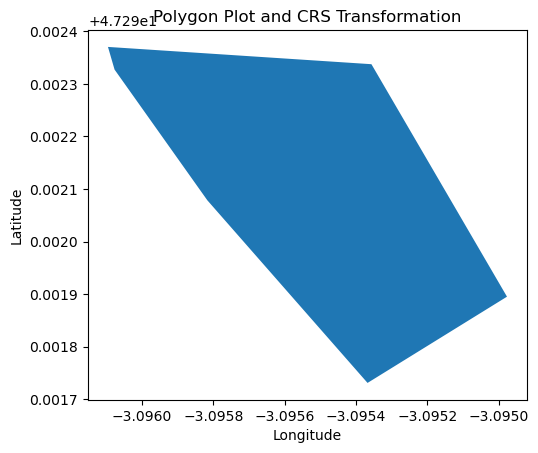

In [12]:
import geopandas as gpd
from shapely.geometry import Polygon
from pyproj import CRS

# Given polygon coordinates
polygon_coords = [
    (239743.7480000034, 6705781.145000003),
    (239799.1169999987, 6705773.202000003),
    (239823.96500000358, 6705722.031000003),
    (239793.10400000215, 6705706.147),
    (239762.2419999987, 6705747.2200000025),
    (239744.76900000125, 6705776.266000003),
    (239743.7480000034, 6705781.145000003)
]

# Create a GeoDataFrame with the polygon
polygon = Polygon(polygon_coords)
gdf = gpd.GeoDataFrame(geometry=[polygon])

# Define the original CRS (coordinate reference system)
original_crs = CRS("EPSG:2154")  # Lambert 93

# Set the GeoDataFrame's CRS
gdf.crs = original_crs

# Reproject the GeoDataFrame to EPSG:4326
gdf = gdf.to_crs("EPSG:4326")

# Plot the GeoDataFrame
gdf.plot()
plt.title("Polygon Plot and CRS Transformation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [46]:
from shapely.geometry import Polygon
from pyproj import CRS
import pyproj
import geopandas as gpd

# Given polygon coordinates
polygon_coords = [
    (239743.7480000034, 6705781.145000003),
    (239799.1169999987, 6705773.202000003),
    (239823.96500000358, 6705722.031000003),
    (239793.10400000215, 6705706.147),
    (239762.2419999987, 6705747.2200000025),
    (239744.76900000125, 6705776.266000003),
    (239743.7480000034, 6705781.145000003)
]

# Create a Shapely polygon
polygon = Polygon(polygon_coords)

# Define the original CRS (coordinate reference system)
original_crs = CRS("EPSG:2154")  # Lambert 93

# Create a pyproj transformer for coordinate conversion
transformer = pyproj.Transformer.from_crs(original_crs, "EPSG:4326", always_xy=True)

# Transform the polygon to the target CRS
transformed_polygon = transform(transformer.transform, polygon)

# Calculate the area of the transformed polygon
area = transformed_polygon.area

print(f"Area of the polygon in square meters: {area:.12f} m²")


Area of the polygon in square meters: 0.000000361963 m²


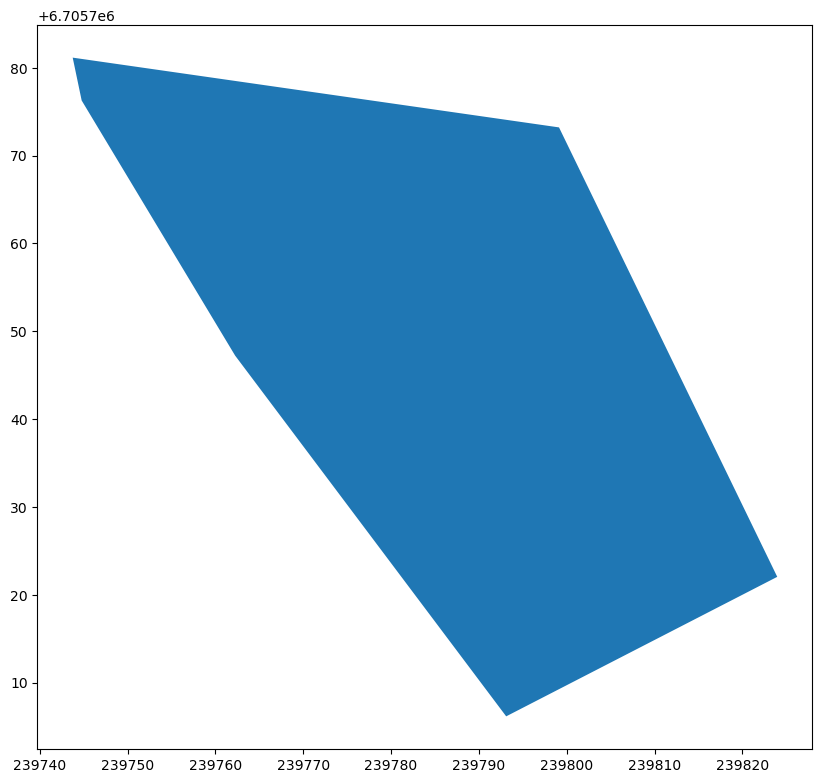

In [29]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely import wkt

# Create a GeoDataFrame with the given polygon
polygon_wkt = "POLYGON ((239743.7480000034 6705781.145000003, 239799.1169999987 6705773.202000003, 239823.96500000358 6705722.031000003, 239793.10400000215 6705706.147, 239762.2419999987 6705747.2200000025, 239744.76900000125 6705776.266000003, 239743.7480000034 6705781.145000003))"
polygon = gpd.GeoDataFrame(geometry=[wkt.loads(polygon_wkt)])
polygon.crs = "EPSG:3857"

# Plot the GeoDataFrame

polygon.plot(figsize=(10, 10))

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from pyproj import Proj, transform

# Create a GeoDataFrame with the given polygon
polygon_wkt = "POLYGON ((239743.7480000034 6705781.145000003, 239799.1169999987 6705773.202000003, 239823.96500000358 6705722.031000003, 239793.10400000215 6705706.147, 239762.2419999987 6705747.2200000025, 239744.76900000125 6705776.266000003, 239743.7480000034 6705781.145000003))"
polygon = gpd.GeoDataFrame(geometry=[wkt.loads(polygon_wkt)])
polygon.crs = "EPSG:2154"

# Convert the coordinates to latitude and longitude
projector = Proj(init='EPSG:2154')
polygon['geometry'] = polygon['geometry'].to_crs(epsg='4326')

# Plot the GeoDataFrame
polygon.plot(figsize=(10, 10))
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from pyproj import Proj, transform

# Create a GeoDataFrame with the given polygon
polygon_wkt = "POLYGON ((239743.7480000034 6705781.145000003, 239799.1169999987 6705773.202000003, 239823.96500000358 6705722.031000003, 239793.10400000215 6705706.147, 239762.2419999987 6705747.2200000025, 239744.76900000125 6705776.266000003, 239743.7480000034 6705781.145000003))"
polygon = gpd.GeoDataFrame(geometry=[wkt.loads(polygon_wkt)])
polygon.crs = "EPSG:3857"

# Calculate the centroid of the polygon
centroid = polygon['geometry'].centroid.iloc[0]

# Convert the centroid coordinates to latitude and longitude
projector = Proj(init='epsg:3857')
centroid_lon, centroid_lat = transform(projector, Proj(init='epsg:4326'), centroid.x, centroid.y)

# Print the latitude and longitude of the centroid
print("Centroid Latitude:", centroid_lat)
print("Centroid Longitude:", centroid_lon)


In [39]:
ymin, xmin, ymax, xmax = field_parcels_geodataframe.to_crs(epsg=4326).total_bounds
print(ymin, xmin, ymax, xmax)

-3.252927132621421 47.28136492401196 -3.061172872961094 47.37901352037807


In [38]:
from pyproj import Proj, transform

# Define the UTM zone and projection
utm_zone = 33  # Replace with the appropriate UTM zone for your data
utm_proj = Proj(proj='utm', zone=utm_zone, ellps='WGS84')

# Coordinates in UTM
utm_x = 228528.54900000244
utm_y = 6704540.672000002

# Convert UTM to latitude and longitude
longitude, latitude = utm_proj(utm_x, utm_y, inverse=True)

print("Latitude:", latitude)
print("Longitude:", longitude)


Latitude: 60.38584015552771
Longitude: 10.072407663602077


In [ ]:
from shapely.geometry import Polygon
from pyproj import Proj, transform

# Input polygon coordinates
polygon_coords = [(239743.7480000034, 6705781.145000003),
                  (239799.1169999987, 6705773.202000003),
                  (239823.96500000358, 6705722.031000003),
                  (239793.10400000215, 6705706.147),
                  (239762.2419999987, 6705747.2200000025),
                  (239744.76900000125, 6705776.266000003),
                  (239743.7480000034, 6705781.145000003)]

# EPSG code for the input CRS
input_epsg = 2154

# EPSG code for WGS84 (standard geographic coordinate system)
output_epsg = 4326

# Create a Shapely Polygon object
polygon = Polygon(polygon_coords)

# Define the transformation function using PyProj
transformer = Proj(init=f'epsg:{input_epsg}'), Proj(init=f'epsg:{output_epsg}')
transformed_polygon = transform(transformer[0], transformer[1], *zip(*polygon_coords))

# Create a new Shapely Polygon object with transformed coordinates
polygon = Polygon(list(zip(*transformed_polygon)))

# Calculate the area of the polygon
area = polygon.area

print(f"Area of the polygon: {area} square meters")


In [56]:
from shapely.geometry import Polygon
from pyproj import Proj, Transformer

# EPSG code for the input CRS
input_epsg = 2154

# EPSG code for WGS84 (standard geographic coordinate system)
output_epsg = 4326

# Access the first 10 geometries in the GeoDataFrame
for index, polygon_geometry in field_parcels_geodataframe.head(100).geometry.iteritems():
    # Extract the coordinates from the polygon geometry
    polygon_coordinates = polygon_geometry.exterior.xy

    # Convert the coordinates to a list of tuples
    coordinates_list = list(zip(polygon_coordinates[0], polygon_coordinates[1]))

    # Create a Shapely Polygon object
    polygon = Polygon(coordinates_list)

    # Define the transformation using PyProj's Transformer class
    transformer = Transformer.from_crs(f'epsg:{input_epsg}', f'epsg:{output_epsg}', always_xy=True)
    transformed_polygon = transformer.transform(*zip(*coordinates_list))

    # Create a new Shapely Polygon object with transformed coordinates
    polygon = Polygon(list(zip(*transformed_polygon)))

    # Calculate the area of the polygon
    area = polygon.area

    print(f"Area of Polygon {index}: {area:.12f} square meters")


Area of Polygon 0: 0.000000361963 square meters
Area of Polygon 1: 0.000000652053 square meters
Area of Polygon 2: 0.000002633922 square meters
Area of Polygon 3: 0.000000959490 square meters
Area of Polygon 4: 0.000000659088 square meters
Area of Polygon 5: 0.000000042367 square meters
Area of Polygon 6: 0.000001584892 square meters
Area of Polygon 7: 0.000001853327 square meters
Area of Polygon 8: 0.000000383237 square meters
Area of Polygon 9: 0.000000945440 square meters
Area of Polygon 10: 0.000000793264 square meters
Area of Polygon 11: 0.000000461052 square meters
Area of Polygon 12: 0.000006795658 square meters
Area of Polygon 13: 0.000000722837 square meters
Area of Polygon 14: 0.000001790111 square meters
Area of Polygon 15: 0.000001204959 square meters
Area of Polygon 16: 0.000000853293 square meters
Area of Polygon 17: 0.000000672408 square meters
Area of Polygon 18: 0.000002830672 square meters
Area of Polygon 19: 0.000000433273 square meters
Area of Polygon 20: 0.00000354

In [ ]:
!pip install pygrib